# Imports

In [2]:
import pandas as pd
import numpy as np
import math

# Series
We can interpret a pandas series as a column in a table. A series is a one-dimensional array that can hold any type of data type. Series can be labeled, and are the default data type of the columns of a pandas dataframe. Pandas series can be created from python lists, numpy arrays, and python dictionaries

In [3]:
# Using lists to create a Pandas series
list_1 = ["Ford","Chevy","Buick","General Motors"]
labels = ["Manufacturer 1","Manufacturer 2","Manufacturer 3","Manufacturer 4"]
series_1 = pd.Series(data = list_1, index = labels); print(f"""Series 1: \n{series_1}""")
print("""\n""")
# Using numpy arrays to create a Pandas series
array_1 = np.array(
    [33,44,55,66]
)
series_2 = pd.Series(array_1); print(f"""Series 2: \n{series_2}""")
print('\n')
# Using dictionaries to create a Pandas series
dict_1 = {
    "First Name": "Seth",
    "Last Name": "Friesz",
    "Age": 24
}
series_3 = pd.Series(dict_1); print(f"""Series 3: \n{series_3}""")


Series 1: 
Manufacturer 1              Ford
Manufacturer 2             Chevy
Manufacturer 3             Buick
Manufacturer 4    General Motors
dtype: object


Series 2: 
0    33
1    44
2    55
3    66
dtype: int64


Series 3: 
First Name      Seth
Last Name     Friesz
Age               24
dtype: object


In [4]:
# Adding, subtracting, multiplying, and dividing a series by a scalar
print(series_2 + 2)
print('\n')

# Adding, subtracting, multiplying, and dividing a series by another series
print(series_2 + series_2)
print('\n')

# Using mathematical functions with series
print(np.log(series_2))

# When using mathematical operators with series, we need to make sure that their labels match
series_4 = pd.Series({4:10,5:20,6:30,7:40}, name = "Random numbers")
print(f"""\nSeries 2: \n{series_2}\n\nSeries 4: \n{series_4}""")


0    35
1    46
2    57
3    68
dtype: int64


0     66
1     88
2    110
3    132
dtype: int64


0    3.496508
1    3.784190
2    4.007333
3    4.189655
dtype: float64

Series 2: 
0    33
1    44
2    55
3    66
dtype: int64

Series 4: 
4    10
5    20
6    30
7    40
Name: Random numbers, dtype: int64


# Dataframes in Pandas
Dataframes are two-dimensional tabular data structure with labeled axes. We can create pandas dataframes by importing various files of data (CSV, Excel, SQL, text), or we can simply wrap pd.DataFrame() around a 2-Dimensional array, multiple pandas series and lists, or dictionaries. Dataframes consist of rows, columns, and data.

### Creating Dataframes

In [5]:
# We can create a pandas DataFrame just by wrapping pd.DataFrame() around multple lists,
# multiple pandas series, numpy arrays, or a dictionary
array_1 = np.random.randint(-10,10, size = (4,4))
array_1
df_1 = pd.DataFrame(
    data = array_1, 
    index = ["Row 1","Row 2","Row 3","Row 4"],
    columns = ["Col 1","Col 2","Col 3","Col 4"]
)
df_1

dict_2 = {
    "Name": pd.Series(["Jason","Bryce","Clarissa","Janean"], index = [1,2,3,4]), 
    "Grade": pd.Series(["A", "B","A"], index = [1,2,4])
}
df_2 = pd.DataFrame(dict_2)
df_2

df_2.shape

(4, 2)

### Data Retrieval in Dataframes
There are various different ways we may want to retrieve data in a dataframe. We may want to obtain a specific row or column, multiple different rows and columns, or maybe just a specific value inside a dataframe. When it comes to data retrieval and slicing, we will want to be using the [start:stop:step] slicing as well as the location function and index location function

In [6]:
np.random.seed(51)
array_1 = np.random.randint(-10,10, size = (5,5))
df_1 = pd.DataFrame(
    data = array_1, 
    index = ["Row 1","Row 2","Row 3","Row 4", "Row 5"],
    columns = ["Col 1","Col 2","Col 3","Col 4", "Col 5"]
)
print(df_1)
# Retrieving a specific column
df_1["Col 2"] 

# Retrieving multiple columns
df_1[["Col 2", "Col 4", "Col 5"]] # Retrieving multiple columns

# Retrieving a specific row using location
df_1.loc["Row 1"] 

# Retrieving a multiple rows using location
df_1.loc[["Row 1", "Row 2"]] 

# Retrieving the third row using index location
df_1.iloc[2] 

# Retrieving a multiple rows using index location
df_1.iloc[[1, 2]]

# Finding the value in the first column and first row
df_1.loc["Row 1" , "Col 1"] 

# Finding the value in the first column and first row (index location)
df_1.iloc[0 , 0] 

# Finding the values that are in specific rows and columns
df_1.loc[["Row 1", "Row 3"], ["Col 1", "Col 2"]]

# We can use typical indexing to subset our data as well using index location
df_1.iloc[0:3, 0:4:2]

       Col 1  Col 2  Col 3  Col 4  Col 5
Row 1     -5    -10     -1     -5      6
Row 2     -1     -5      4     -5     -6
Row 3     -7     -4      0      0     -4
Row 4     -9      3     -3      6     -2
Row 5      3     -5      8      1     -7


,Col 1,Col 3
Row 1,-5,-1
Row 2,-1,4
Row 3,-7,0


### Data Editing in Dataframes
There are different ways we could edit or change data. Whether it may be creating a new column or row, deleting columns and rows, resetting indices as well as changing a column name, we have full customization of how we want our dataframe to look.

In [7]:
# Adding a column into a dataframe
df_1["Sum"] = df_1["Col 1"] + df_1["Col 2"]+df_1["Col 3"] + df_1["Col 4"] +df_1["Col 5"] 
df_1 

# Adding a new row (pd.series) into a dataframe
series_1 = pd.Series({
    "Col 1": np.random.randint(-10,10),
    "Col 2": np.random.randint(-10,10),
    "Col 3": np.random.randint(-10,10),
    "Col 4": np.random.randint(-10,10),
    "Col 5": np.random.randint(-10,10)
}, name = "Row 6")
df_1 = df_1.append(series_1) # Adding a row into a DataFrame
df_1

# Adding a new row (np.array) into a dataframe
array_2 = np.random.randint(-10,10, size = (5,5))
df_2 = pd.DataFrame(
    data = array_2,
    columns = ["Col 1","Col 2","Col 3","Col 4", "Col 5"]
)
df_2
array_2 = np.random.randint(-10,10, size = (1,5))
array_2
df_2.append(pd.DataFrame(array_2.reshape(1,-1), columns = list(df_2)) , ignore_index = True)

df_2


# Deleting a column in a dataframe
df_1.drop('Sum', axis = 1, inplace = True) 
df_1

# Deleting a row in a dataframe
df_1.drop('Row 6', axis = 0, inplace = True) 
df_1

# Resetting index to a specific column in the dataframe
index_values = list(range(1,6))
df_1["Row Number"] = index_values
df_1.set_index("Row Number", inplace = True) 

df_1.assign(Total = df_1["Col 1"] + df_1["Col 2"]+df_1["Col 3"] + df_1["Col 4"] +df_1["Col 5"])
df_1.assign(Product = lambda x: x["Col 1"] * x["Col 2"] * x["Col 3"] * x["Col 4"] * x["Col 5"])

# How to rename specific dataframe columns in pandas
df_1
df_1.rename(columns = {"Col 1": "Column 1", "Col 3": "Column 3"}) # The name will not change in the
df_1                                                              # dataframe without inplace


/var/folders/rd/vh84zxgj7tq94wxhctb_7jjc0000gn/T/ipykernel_986/1791449017.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_1 = df_1.append(series_1) # Adding a row into a DataFrame
/var/folders/rd/vh84zxgj7tq94wxhctb_7jjc0000gn/T/ipykernel_986/1791449017.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2.append(pd.DataFrame(array_2.reshape(1,-1), columns = list(df_2)) , ignore_index = True)


,Col 1,Col 2,Col 3,Col 4,Col 5
Row Number,,,,,
1,-5,-10,-1,-5,6
2,-1,-5,4,-5,-6
3,-7,-4,0,0,-4
4,-9,3,-3,6,-2
5,3,-5,8,1,-7


### Importing Data
There are various forms of data we can import. The two methods that I will show is importing comma-separated values file (CSV) and Microsoft Excel files (xlsx). Yet, we can import many other different data files like .txt files, .dat files, and also reading in SQL data by creating a connection to a database, running a SQL query, and importing the result into the python environment.

In [8]:
# We can read in a comma separated values file (CSV) using pd.read_csv(). We can 
# We can also save a pandas dataframe to a CSV file using to_csv()
titanic = pd.read_csv("https://raw.githubusercontent.com/sethvfriesz/SDSU-DS-Symposium/main/Datasets/titanic.csv")
titanic.to_csv("titanic.csv")

# We can also read and save to excel files using pd.read_excel and .to_excel()
fin_df = pd.read_excel("Financial Sample.xlsx")
fin_df.to_excel("Financial Sample.xlsx")

titanic.drop('Unnamed: 0', axis = 1, inplace = True)

In [9]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Conditional Selection
Often we are asked to focus our analysis on a subset of data that meets certain conditions. The data selection conditions can be simple, or they can be detailed. With pandas, we can easily select data and scales to the granularity of your selection criteria.

In [10]:
# Subsetting titanic data to feature passengers older than 20 years old
above_20_titanic = titanic.loc[titanic["Age"] > 20,] 
above_20_titanic
# Subsetting titanic data to feature passengers between the ages of 20 and are male
above_20_titanic = titanic.loc[(titanic["Age"] > 20) & (titanic["Sex"] == "male"),] 
above_20_titanic
# Subsetting titanic data to feature passengers in the first and 2nd class
_23_class = titanic[titanic["Pclass"].isin([1,2])]
_23_class
_23_class_2 = titanic.loc[(titanic["Pclass"] == 1) | (titanic["Pclass"] == 2),]
_23_class_2
# Subsetting data to find the name and class of males 20 and older
titanic_df_1 = titanic.loc[(titanic["Sex"] == 'male') & (titanic["Age"] >= 20),["Name", "Pclass"]]
titanic_df_1

,Name,Pclass
0,"Braund, Mr. Owen Harris",3
4,"Allen, Mr. William Henry",3
6,"McCarthy, Mr. Timothy J",1
12,"Saundercock, Mr. William Henry",3
13,"Andersson, Mr. Anders Johan",3
...,...,...
883,"Banfield, Mr. Frederick James",2
884,"Sutehall, Mr. Henry Jr",3
886,"Montvila, Rev. Juozas",2
889,"Behr, Mr. Karl Howell",1


### Math

In [13]:
np.random.seed(51)
df = pd.DataFrame(np.random.randint(0, 10, (3, 4)),
                  columns=['A', 'B', 'C', 'D'])
df

# Transforming every value in the dataframe exponentially
np.exp(df) 

# Adding a value of 1 to each element and then dividing by 4
(df + 1) / 4 

# Adding two dataframes of different size
A = pd.DataFrame(np.random.randint(-30, 20, (2, 2)),
                 columns=list('AB'))
B = pd.DataFrame(np.random.randint(3, 24, (3, 3)),
                 columns=list('BAC'))
print(A)
print(B)
print(A+B)

# Numerical operations between dataframes and series (column-wise)
A = pd.DataFrame(np.random.randint(-30, 20, (4, 4)))
print(A)
print(type(A))
print(A[0])
print(type(A[0]))
print(A-A[0])

# Numerical operations between dataframes and series (row-wise)
df = pd.DataFrame(np.random.randint(-30, 20, (4, 4)), columns=list('ABCD'))
print(df)
print(df.iloc[0])
print(df - df.iloc[0])

   A  B
0  6  5
1 -3  8
    B   A   C
0  13  23  13
1   9   4  16
2  23  10  19
      A     B   C
0  29.0  18.0 NaN
1   1.0  17.0 NaN
2   NaN   NaN NaN
    0   1   2   3
0  -6  10 -17  -2
1 -25 -12 -19 -27
2   0  -7 -23 -27
3  -3   4   0 -13
<class 'pandas.core.frame.DataFrame'>
0    -6
1   -25
2     0
3    -3
Name: 0, dtype: int64
<class 'pandas.core.series.Series'>
    0   1   2   3
0   0  35 -17   1
1 -19  13 -19 -24
2   6  18 -23 -24
3   3  29   0 -10
    A   B   C   D
0 -27  15 -22   8
1 -17 -25  -7 -25
2  19 -29  19 -27
3  -8  -3  -7   4
A   -27
B    15
C   -22
D     8
Name: 0, dtype: int64
    A   B   C   D
0   0   0   0   0
1  10 -40  15 -33
2  46 -44  41 -35
3  19 -18  15  -4


### Group Data

In [14]:
# Groupby allows you to group rows based on a columnand perform a function
# that combines those values (Aggregate Function)
dict_5 = {'Store': [1,2,1,2], 'Flavor': ['Choc', 'Van', 'Straw', 'Choc'], 
         'Sales': [26, 12, 18, 22]}

df_11 = pd.DataFrame(dict_5)

# Group data by the store number
by_store = df_11.groupby('Store')
# Get mean sales by store
by_store.mean()

# Get sales total just for store 1
by_store.sum().loc[1]

# You can use multiple functions of get a bunch
by_store.describe()

Sales                                              
      count  mean       std   min   25%   50%   75%   max
Store                                                    
1       2.0  22.0  5.656854  18.0  20.0  22.0  24.0  26.0
2       2.0  17.0  7.071068  12.0  14.5  17.0  19.5  22.0

### Concatenate, Merge, and Join Data
When we are wanting to concatenate to dataframes together, we are looking to add rows from dataframe two to the bottom of dataset one. It is important to note that the two dataframes need to share the same columns. When it comes to merging, the merging concept behave similar to SQL

In [22]:
# You can concatenate DFs in the order DFs are provided
df_12 = pd.DataFrame({'A': [1,2,3],
                     'B': [4,5,6]},
                    index=[1,2,3])
df_13 = pd.DataFrame({'A': [7,8,9],
                     'B': [10,11,12]},
                    index=[4,5,6])
pd.concat([df_12, df_13])

# Merge 2 DFs using their shared key column
df_12 = pd.DataFrame({'A': [1,2,3],
                     'B': [4,5,6],
                     'key': [1,2,3]})
df_13 = pd.DataFrame({'A': [7,8,9],
                     'B': [10,11,12],
                     'key': [1,2,3]})
# inner merges at the intersection of keys
pd.merge(df_12, df_13, how='left', on='key')
# how='left' or 'right' : Use keys from left or right frame
# how='outer' : Use union of keys

# You can join DFs with different indexes and instead of using 
# keys use a column
df_12 = pd.DataFrame({'A': [1,2,3],
                     'B': [4,5,6]},
                    index=[1,2,3])
df_13 = pd.DataFrame({'C': [7,8,9],
                     'D': [10,11,12]},
                    index=[1,4,5])
df_12.join(df_13, how='outer')


,A,B,C,D
1,1.0,4.0,7.0,10.0
2,2.0,5.0,NaN,NaN
3,3.0,6.0,NaN,NaN
4,NaN,NaN,8.0,11.0
5,NaN,NaN,9.0,12.0


### Statistics

In [27]:
movie_df = pd.read_csv("IMDB-Movie-Data.csv")
movie_df.dropna(inplace = True)

In [28]:
movie_df

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
993,994,Resident Evil: Afterlife,"Action,Adventure,Horror",While still out to destroy the evil Umbrella C...,Paul W.S. Anderson,"Milla Jovovich, Ali Larter, Wentworth Miller,K...",2010,97,5.9,140900,60.13,37.0
994,995,Project X,Comedy,3 high school seniors throw a birthday party t...,Nima Nourizadeh,"Thomas Mann, Oliver Cooper, Jonathan Daniel Br...",2012,88,6.7,164088,54.72,48.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0


In [29]:
movie_df.count()
# Mean of series
movie_df["Revenue (Millions)"].mean()
# Median of series
movie_df["Revenue (Millions)"].median()
# Minimum of a series
movie_df["Revenue (Millions)"].min()
# Maximum of a series
movie_df["Revenue (Millions)"].max()
# Product of values in a series
#movie_df["Revenue (Millions)"].prod()
# Standard deviation
movie_df["Revenue (Millions)"].std() 
# Variance
movie_df["Revenue (Millions)"].var()
# Standard error
movie_df["Revenue (Millions)"].sem() 
# Negative : Left long tail, Positive : Right long tail
movie_df["Revenue (Millions)"].skew()
# Kurtosis
movie_df["Revenue (Millions)"].kurt()
movie_df["Revenue (Millions)"].quantile(.5)
movie_df["Revenue (Millions)"].cumsum()
movie_df["Revenue (Millions)"].cumprod()
movie_df["Revenue (Millions)"].cummax()
movie_df["Revenue (Millions)"].cummin()


0      333.13
1      126.46
2      126.46
3      126.46
4      126.46
        ...  
993      0.00
994      0.00
996      0.00
997      0.00
999      0.00
Name: Revenue (Millions), Length: 838, dtype: float64

### Iteration

In [30]:
# Iterating over DFs
arr_4 = np.random.randint(-10, 10, size=(4, 4))
df_8 = pd.DataFrame(arr_4, ["Row 1", 'Row 2',"Row 3", 'Row 4'], ["Col 1", 'Col 2',"Col 3", 'Col 4'])
print(df_8)

# items allows you to iterate through key value pairs to make
# calculations 1 column at a time
for label, ser in df_8.items():
    print(label)
    print(ser)
    

# You can also iterate through rows
for index, row in df_8.iterrows():
    print(f"""{index}\n{row}""")



       Col 1  Col 2  Col 3  Col 4
Row 1     -7     -1     -9     -7
Row 2      9      9      6      4
Row 3      6     -7     -1      5
Row 4     -4      4     -3      0
Col 1
Row 1   -7
Row 2    9
Row 3    6
Row 4   -4
Name: Col 1, dtype: int64
Col 2
Row 1   -1
Row 2    9
Row 3   -7
Row 4    4
Name: Col 2, dtype: int64
Col 3
Row 1   -9
Row 2    6
Row 3   -1
Row 4   -3
Name: Col 3, dtype: int64
Col 4
Row 1   -7
Row 2    4
Row 3    5
Row 4    0
Name: Col 4, dtype: int64
Row 1
Col 1   -7
Col 2   -1
Col 3   -9
Col 4   -7
Name: Row 1, dtype: int64
Row 2
Col 1    9
Col 2    9
Col 3    6
Col 4    4
Name: Row 2, dtype: int64
Row 3
Col 1    6
Col 2   -7
Col 3   -1
Col 4    5
Name: Row 3, dtype: int64
Row 4
Col 1   -4
Col 2    4
Col 3   -3
Col 4    0
Name: Row 4, dtype: int64


### Sorting

In [31]:
df_8

# Sorting by index will return the same results if indexes
# are in order, to reverse indexes mark ascending as False
df_8.sort_index(ascending=False)

# Sort by value for column D (Use the same function for series)
df_8.sort_values(by='Col 2')

,Col 1,Col 2,Col 3,Col 4
Row 3,6,-7,-1,5
Row 1,-7,-1,-9,-7
Row 4,-4,4,-3,0
Row 2,9,9,6,4


### Handling Missing Data

In [35]:
dict_1 = {'Col 1': [1,2,np.nan,6,10], 'Col 2': [1, np.nan, np.nan,np.nan,-3], 'Col 3': [7,8,9,22,14]}
df = pd.DataFrame(dict_1)
print(df)

# Drop missing data from DF (Drops any row with missing values)
df.dropna()
# Drop all columns with any missing data
df.dropna(axis=1)
# Drop row unless it has at least 3 non-NaN values
df.dropna(thresh=3)
# Fill NaN values with 0
df.fillna(value=0)
# Fill column 1 NaN values with the mean of the column
df['Col 1'].fillna(value=df['Col 1'].mean())
# Fill with previous value
df.fillna(method='ffill')

# Fill with next value (If there is a next value)
df.fillna(method='bfill')


   Col 1  Col 2  Col 3
0    1.0    1.0      7
1    2.0    NaN      8
2    NaN    NaN      9
3    6.0    NaN     22
4   10.0   -3.0     14


,Col 1,Col 2,Col 3
0,1.0,1.0,7
1,2.0,-3.0,8
2,6.0,-3.0,9
3,6.0,-3.0,22
4,10.0,-3.0,14


Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

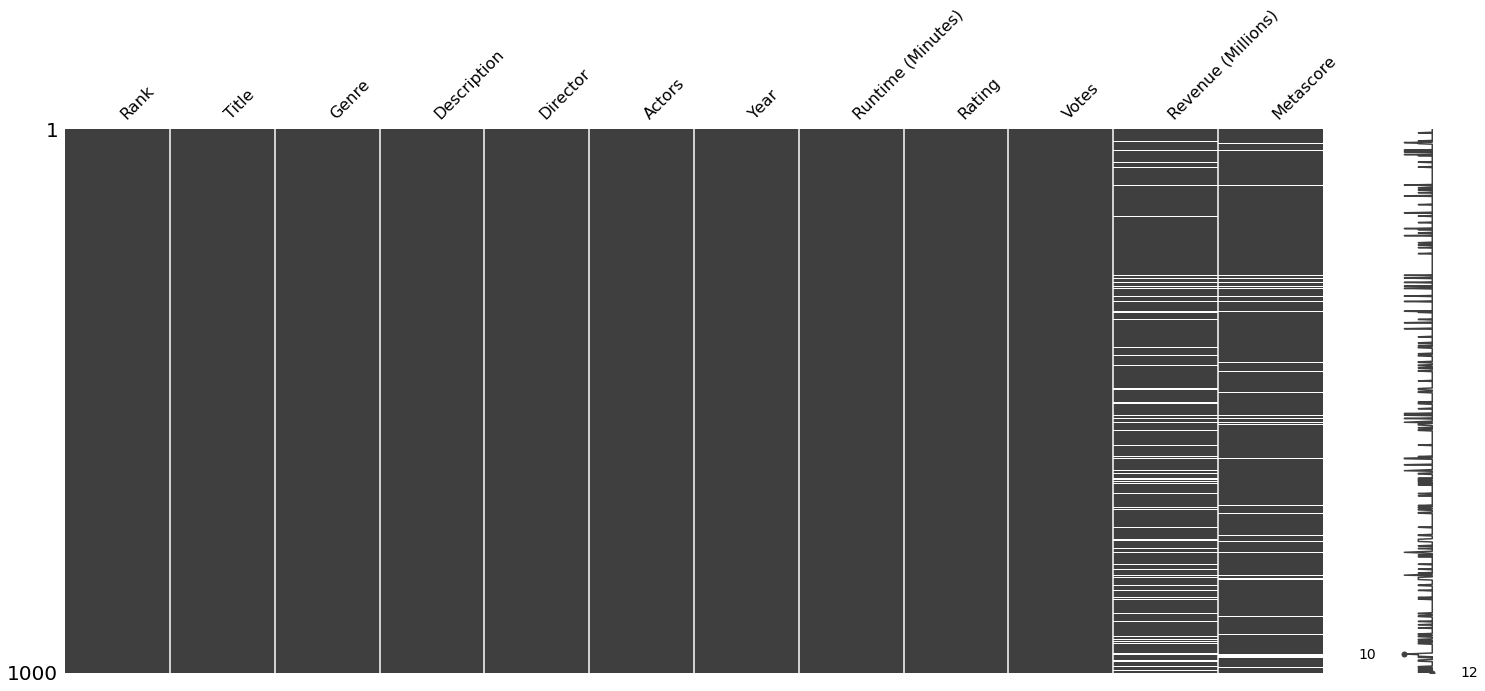

In [39]:
import missingno
movie_df = pd.read_csv("IMDB-Movie-Data.csv")
missingno.matrix(movie_df)
movie_df.isna().sum()